In [15]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import os

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [17]:
df_Tata = pd.read_csv("TATAMOTORS_with_indicators_.csv")

In [18]:
df_Tata['date'] = pd.DatetimeIndex(pd.date_range('2021-11-20 02:59:00+05:30', periods=len(df_Tata),  freq='min')) #sobreescribo mi columna date con nuevo range por minutos 
df_Tata = df_Tata.set_index('date') # pongo la columna fecha como indice. para facilitar el analisis.

df_Tata['year'] = df_Tata.index.year
df_Tata['month'] = df_Tata.index.month
df_Tata['day'] = df_Tata.index.day
df_Tata['weekday'] = df_Tata.index.day_name()
df_Tata['weekofyear'] = df_Tata.index.isocalendar().week
df_Tata['hour'] = df_Tata.index.hour
df_Tata['minute'] = df_Tata.index.minute

weekday_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df_Tata['weekday'] = df_Tata['weekday'].map(weekday_mapping)

#df_Tata = df_Tata.drop(columns=["high","low"])
#df_Tata = df_Tata.drop(columns=["sma20","sma10","sma15","ema5","ema10","ema15","middleband","lowerband","TRIMA5","TRIMA20","KAMA10","KAMA20","MOM10","MOM15","ROC10","ROC20","ATR","macd510","macd520","macd1020","macd1520","ADX5","ADX20"])

In [19]:
train_size = int(0.8 * len(df_Tata))

df_train_tata = df_Tata[:train_size]
df_test_tata = df_Tata[train_size:]


In [20]:
# Guarda df_train como un archivo CSV
#df_train_tata.to_csv('df_train.csv', index = False)

# Guarda df_test como un archivo CSV
#df_test_tata.to_csv('df_test.csv', index = False)

In [21]:
df_train_tata

,open,high,low,close,volume,sma5,sma10,sma15,sma20,ema5,...,TYPPRICE,HT_DCPERIOD,BETA,year,month,day,weekday,weekofyear,hour,minute
date,,,,,,,,,,,,,,,,,,,,,
2021-11-20 02:59:00+05:30,591.30,591.85,590.05,590.05,46808,591.93,593.215,591.446667,589.5925,591.680691,...,590.650000,33.740113,1.177608,2021,11,20,6,46,2,59
2021-11-20 03:00:00+05:30,589.80,590.50,588.60,590.50,77183,591.37,592.785,591.813333,589.9750,591.287127,...,589.866667,32.404181,1.028755,2021,11,20,6,46,3,0
2021-11-20 03:01:00+05:30,590.25,591.55,589.45,589.45,62950,590.93,592.330,592.000000,590.2750,590.674751,...,590.150000,31.377250,0.924290,2021,11,20,6,46,3,1
2021-11-20 03:02:00+05:30,589.30,589.95,588.40,588.90,78077,590.09,591.765,592.093333,590.4875,590.083168,...,589.083333,30.566204,0.803627,2021,11,20,6,46,3,2
2021-11-20 03:03:00+05:30,588.90,591.70,588.40,591.00,66550,589.98,591.355,592.140000,590.8175,590.388778,...,590.366667,29.669480,0.529479,2021,11,20,6,46,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 12:51:00+05:30,125.00,125.40,124.90,125.00,806218,125.09,125.600,126.193333,126.6225,125.184534,...,125.100000,20.937365,0.500466,2022,1,31,1,5,12,51
2022-01-31 12:52:00+05:30,125.05,126.10,124.95,125.80,1125524,125.21,125.550,126.046667,126.5050,125.389689,...,125.616667,22.026976,0.130863,2022,1,31,1,5,12,52
2022-01-31 12:53:00+05:30,125.85,125.85,125.20,125.30,550132,125.24,125.425,125.870000,126.3675,125.359793,...,125.450000,23.353467,0.014244,2022,1,31,1,5,12,53


In [22]:
df_train_tata.describe()

,open,high,low,close,volume,sma5,sma10,sma15,sma20,ema5,...,TYPPRICE,HT_DCPERIOD,BETA,year,month,day,weekday,weekofyear,hour,minute
count,104277.000000,104277.000000,104277.000000,104277.000000,1.042770e+05,104277.000000,104277.000000,104277.000000,104277.000000,104277.000000,...,104277.000000,104277.000000,104277.000000,104277.000000,104277.000000,104277.000000,104277.000000,104277.0,104277.000000,104277.000000
mean,323.737121,324.189242,323.260024,323.725734,2.776797e+05,323.734693,323.745926,323.757110,323.768197,323.734698,...,323.725000,21.984318,0.526197,2021.421723,7.210861,17.264747,4.043289,30.905051,11.476874,29.499209
std,146.265682,146.390486,146.131482,146.261507,5.676268e+05,146.261627,146.262211,146.262709,146.263047,146.260612,...,146.260758,5.070070,0.736778,0.493837,5.314422,8.902733,2.025937,22.925946,6.912499,17.317806
min,63.600000,64.700000,63.500000,63.600000,0.000000e+00,64.570000,64.895000,65.213333,65.302500,64.809379,...,63.950000,11.448817,-12.360580,2021.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
25%,176.050000,176.350000,175.750000,176.050000,5.315500e+04,176.040000,176.035000,176.070000,176.102500,176.036252,...,176.050000,18.306562,0.165138,2021.000000,1.000000,10.000000,2.000000,3.0,5.000000,14.000000
50%,352.000000,352.500000,351.500000,352.000000,1.098190e+05,351.990000,352.025000,352.056667,352.065000,351.977990,...,351.966667,21.105846,0.478023,2021.000000,11.000000,19.000000,4.000000,47.0,11.000000,29.000000
75%,444.700000,445.200000,444.100000,444.650000,2.756680e+05,444.680000,444.685000,444.663333,444.682500,444.684766,...,444.666667,24.704270,0.830484,2022.000000,12.000000,25.000000,6.000000,50.0,17.000000,44.000000
max,611.700000,612.000000,609.650000,611.950000,5.234495e+07,609.710000,608.835000,608.530000,607.852500,609.276942,...,610.883333,45.583497,21.337113,2022.000000,12.000000,31.000000,7.000000,52.0,23.000000,59.000000


In [23]:
import plotly.graph_objects as go
from datetime import datetime

In [24]:
fig = go.Figure(data=[go.Candlestick(x=df_train_tata.index[:5000],
                open=df_train_tata['open'][:5000],
                high=df_train_tata['volume'][:5000],
                low=df_train_tata['TRIMA10'][:5000],
                close=df_train_tata['close'][:5000])],
                layout=go.Layout(autosize=False, width=1000, height=600))

fig.show()

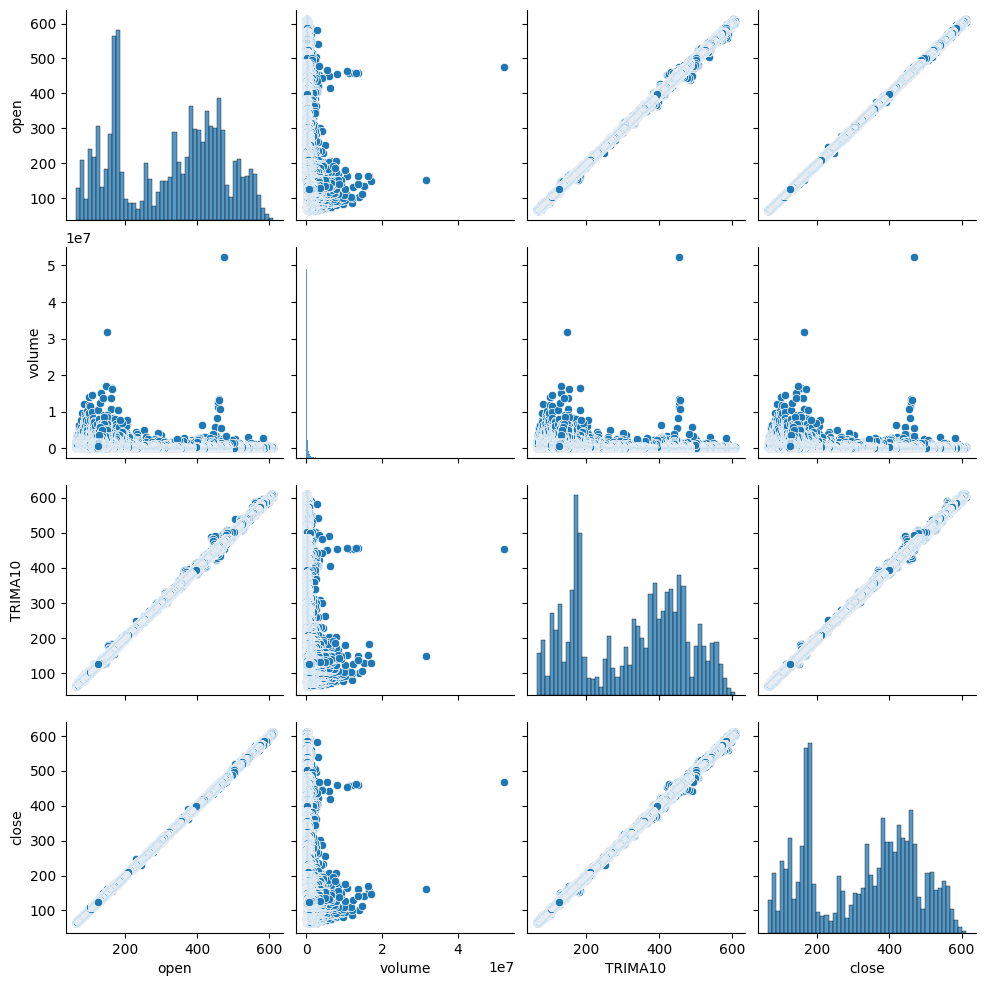

In [25]:
import seaborn as sns
sns.pairplot(df_train_tata[['open', 'volume', 'TRIMA10', 'close']])

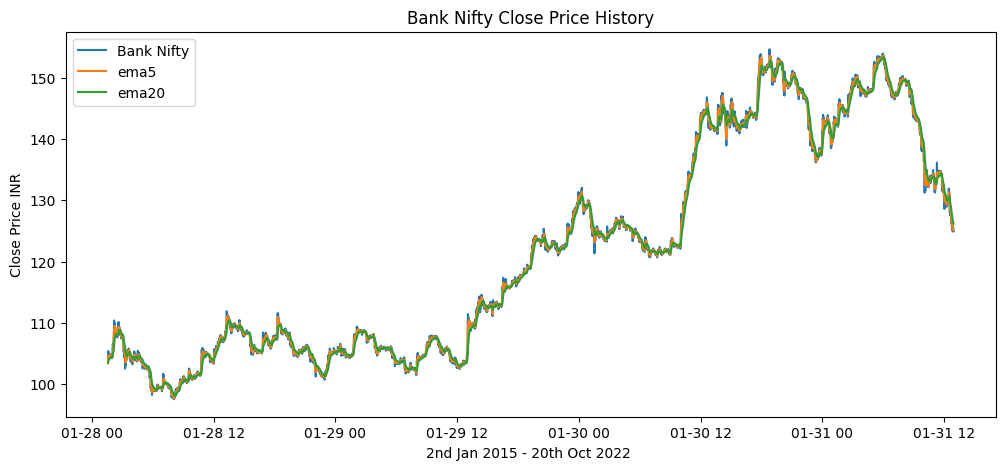

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(df_train_tata['close'][-5000:], label='Bank Nifty')
plt.plot(df_train_tata['ema5'][-5000:], label='ema5')
plt.plot(df_train_tata['ema20'][-5000:], label='ema20')
plt.title('Bank Nifty Close Price History')
plt.xlabel("2nd Jan 2015 - 20th Oct 2022 ")
plt.ylabel("Close Price INR")
plt.legend(loc="upper left")
plt.show()

In [27]:
df_train_tata

,open,high,low,close,volume,sma5,sma10,sma15,sma20,ema5,...,TYPPRICE,HT_DCPERIOD,BETA,year,month,day,weekday,weekofyear,hour,minute
date,,,,,,,,,,,,,,,,,,,,,
2021-11-20 02:59:00+05:30,591.30,591.85,590.05,590.05,46808,591.93,593.215,591.446667,589.5925,591.680691,...,590.650000,33.740113,1.177608,2021,11,20,6,46,2,59
2021-11-20 03:00:00+05:30,589.80,590.50,588.60,590.50,77183,591.37,592.785,591.813333,589.9750,591.287127,...,589.866667,32.404181,1.028755,2021,11,20,6,46,3,0
2021-11-20 03:01:00+05:30,590.25,591.55,589.45,589.45,62950,590.93,592.330,592.000000,590.2750,590.674751,...,590.150000,31.377250,0.924290,2021,11,20,6,46,3,1
2021-11-20 03:02:00+05:30,589.30,589.95,588.40,588.90,78077,590.09,591.765,592.093333,590.4875,590.083168,...,589.083333,30.566204,0.803627,2021,11,20,6,46,3,2
2021-11-20 03:03:00+05:30,588.90,591.70,588.40,591.00,66550,589.98,591.355,592.140000,590.8175,590.388778,...,590.366667,29.669480,0.529479,2021,11,20,6,46,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 12:51:00+05:30,125.00,125.40,124.90,125.00,806218,125.09,125.600,126.193333,126.6225,125.184534,...,125.100000,20.937365,0.500466,2022,1,31,1,5,12,51
2022-01-31 12:52:00+05:30,125.05,126.10,124.95,125.80,1125524,125.21,125.550,126.046667,126.5050,125.389689,...,125.616667,22.026976,0.130863,2022,1,31,1,5,12,52
2022-01-31 12:53:00+05:30,125.85,125.85,125.20,125.30,550132,125.24,125.425,125.870000,126.3675,125.359793,...,125.450000,23.353467,0.014244,2022,1,31,1,5,12,53


In [28]:
df_train_tata.columns

Index(['open', 'high', 'low', 'close', 'volume', 'sma5', 'sma10', 'sma15',
       'sma20', 'ema5', 'ema10', 'ema15', 'ema20', 'upperband', 'middleband',
       'lowerband', 'HT_TRENDLINE', 'KAMA10', 'KAMA20', 'KAMA30', 'SAR',
       'TRIMA5', 'TRIMA10', 'TRIMA20', 'ADX5', 'ADX10', 'ADX20', 'APO', 'CCI5',
       'CCI10', 'CCI15', 'macd510', 'macd520', 'macd1020', 'macd1520',
       'macd1226', 'MOM10', 'MOM15', 'MOM20', 'ROC5', 'ROC10', 'ROC20', 'PPO',
       'RSI14', 'RSI8', 'slowk', 'slowd', 'fastk', 'fastd', 'fastksr',
       'fastdsr', 'ULTOSC', 'WILLR', 'ATR', 'Trange', 'TYPPRICE',
       'HT_DCPERIOD', 'BETA', 'year', 'month', 'day', 'weekday', 'weekofyear',
       'hour', 'minute'],
      dtype='object')

Actual values:  [572.893 563.611 542.745 512.582 452.708 420.269 384.252 335.037 326.43
 381.841]
Predictions:    [347.403 347.424 347.53  346.568 341.382 342.184 342.676 341.625 340.375
 342.98 ]
RMSE: 122.864
MAE: 108.764
MAPE: 0.501
MASE: 4.533
R^2 score: 0.293


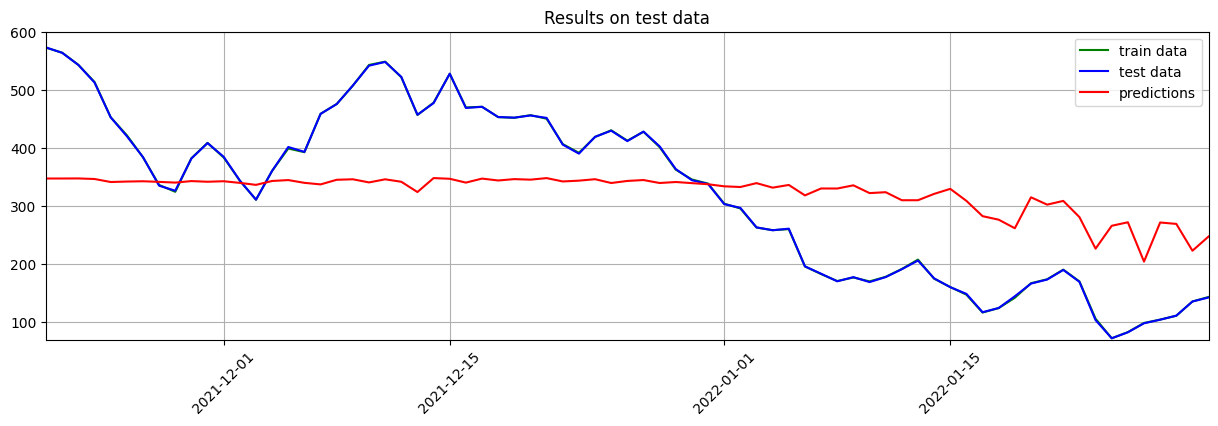

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Definir las variables de entrada X y la variable objetivo y
X = df_train_tata[['macd1226',"volume"]] # puedes añadir más características si lo deseas
y = df_train_tata['close']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Entrenar el modelo con los datos sin resamplear
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Crear un DataFrame para las predicciones
pred = pd.Series(y_pred, index=y_test.index)
pred.columns = ['close']

# Resamplear los datos para la gráfica
y_train_resampled = y_train.resample('D').mean()
y_test_resampled = y_test.resample('D').mean()
pred_resampled = pred.resample('D').mean()

# Graficar los datos resampleados
plt.figure(figsize=(15,4))
plt.plot(y_train_resampled, c='green', label='train data')
plt.plot(y_test_resampled, c='blue', label='test data')
plt.plot(pred_resampled, c='red', label='predictions')
plt.legend()
plt.grid(), plt.margins(x=0)
plt.title('Results on test data'), plt.xticks(rotation=45)
plt.ylim(70, 600)  # Ajusta el eje y entre 200 y 600

print('Actual values: ', np.around(y_test_resampled[:10].tolist(),3))
print('Predictions:   ', np.around(pred_resampled[:10].tolist(),3))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test_resampled, pred_resampled)))
MAE = mean_absolute_error(y_test_resampled, pred_resampled)
MAPE = np.mean(np.abs(pred_resampled - y_test_resampled)/np.abs(y_test_resampled))
MASE = np.mean(np.abs(y_test_resampled - pred_resampled ))/(np.abs(np.diff(y_train_resampled)).sum()/(len(y_train_resampled)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(y_test_resampled, pred_resampled))

Actual values: 

 [134.073 133.292 161.119 179.281 236.972 317.717 319.517 302.164 308.987
 335.846]
Predictions:    [254.051 273.798 254.767 277.031 130.773 200.936 245.882 260.732 275.431
 301.419]
RMSE: 115.996
MAE: 98.835
MAPE: 0.351
MASE: 4.120
R^2 score: 0.063


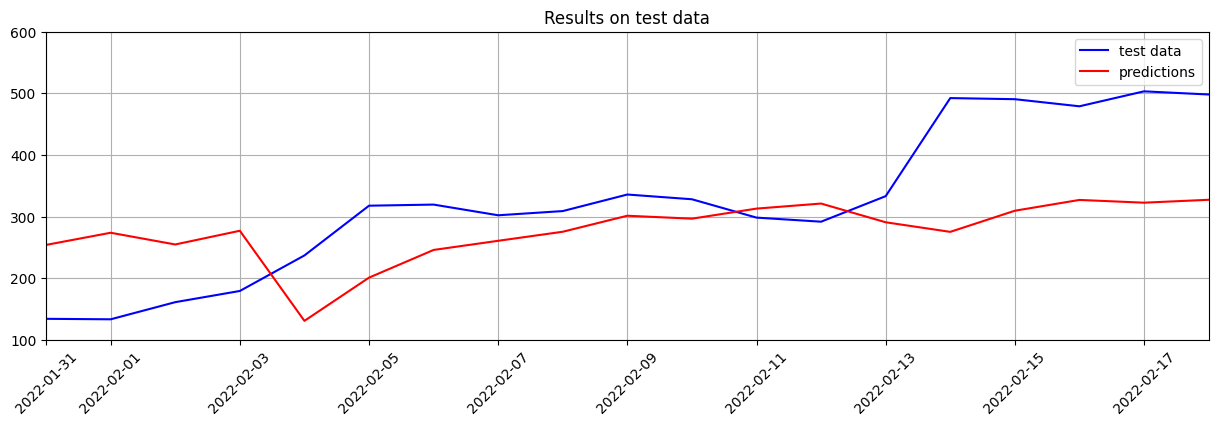

In [30]:
# Asumiendo que df_test_tata es tu conjunto de datos de prueba
X_test_tata = df_test_tata[['macd1226', 'volume']]

# Hacer predicciones en el conjunto de prueba
y_pred_tata = model.predict(X_test_tata)

# Crear un DataFrame para las predicciones
pred_tata = pd.Series(y_pred_tata, index=df_test_tata.index)
pred_tata.columns = ['predicted']

# Resamplear los datos para la gráfica
y_test_tata_resampled = df_test_tata['close'].resample('D').mean()
pred_tata_resampled = pred_tata.resample('D').mean()

# Graficar los datos resampleados
plt.figure(figsize=(15,4))
plt.plot(y_test_tata_resampled, c='blue', label='test data')
plt.plot(pred_tata_resampled, c='red', label='predictions')
plt.legend()
plt.grid(), plt.margins(x=0)
plt.title('Results on test data'), plt.xticks(rotation=45)
plt.ylim(100, 600)  # Ajusta el eje y entre 200 y 600

# Calcular las métricas de error
print('Actual values: ', np.around(y_test_tata_resampled[:10].tolist(),3))
print('Predictions:   ', np.around(pred_tata_resampled[:10].tolist(),3))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test_tata_resampled, pred_tata_resampled)))
MAE = mean_absolute_error(y_test_tata_resampled, pred_tata_resampled)
MAPE = np.mean(np.abs(pred_tata_resampled - y_test_tata_resampled)/np.abs(y_test_tata_resampled))
MASE = np.mean(np.abs(y_test_tata_resampled - pred_tata_resampled ))/(np.abs(np.diff(y_train_resampled)).sum()/(len(y_train_resampled)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(y_test_tata_resampled, pred_tata_resampled))

In [31]:
# Calcular los residuos
residuos = y_test - y_pred

# Calcular el valor absoluto de los residuos
residuos_abs = np.abs(residuos)

# Calcular la mediana de los residuos
mediana = np.median(residuos_abs)

# Calcular el rango intercuartil de los residuos
iqr = np.percentile(residuos_abs, 75) - np.percentile(residuos_abs, 25)

# Definir un umbral para los outliers (por ejemplo, 1.5 veces el rango intercuartil por encima de la mediana)
umbral = mediana + 1.5 * iqr

# Crear una máscara booleana para los outliers
mascara = residuos_abs < umbral

# Filtrar los residuos y las predicciones para eliminar los outliers
residuos_filtrados = residuos[mascara]
predicciones_filtradas = y_pred[mascara]

# Ahora puedes crear tu gráfico utilizando 'residuos_filtrados' y 'predicciones_filtradas'

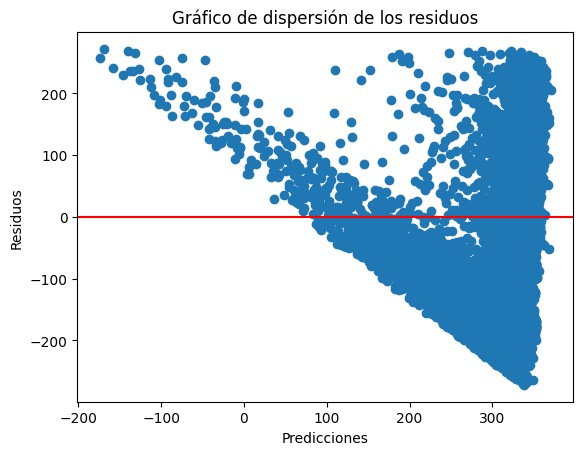

In [32]:
# Crear el gráfico de dispersión
plt.scatter(predicciones_filtradas, residuos_filtrados)
plt.axhline(y=0, color='r', linestyle='-')  # Añadir una línea horizontal en 0
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de los residuos')
plt.show()

In [35]:
import pickle

# Guardar el modelo en un archivo pickle
with open('linreg.pkl', 'wb') as f:
    pickle.dump(model, f)